## Необходимые билиотеки

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os.path
from scipy.optimize import curve_fit
from scipy import interpolate
import math
import os 
from tqdm import tqdm_notebook as tqdm
from scipy.stats import chisquare
import re
from datetime import datetime
import scipy.stats as stats
import time
from scipy.stats.stats import pearsonr
PI=math.pi

## Чтение файлов-осциллограмм по 8 диноду и запись нарастания фронта (половина амплитуды), даты, номера событий, номера детектора в один файл, амплитуды

In [ ]:
PATH = r"D:\INR\prisma-16"

In [2]:
directory = 'D:\prisma-16' 
new_name=r"D:\prisma-16\AmaxANDhalftimeD8.txt"
found = open(new_name, 'w+') 
files = os.listdir(directory) 
#images = filter(lambda x: x.endswith('.txt'), files) 

for d in tqdm(files): 
    s=str(d)
    if (s.startswith('Eas')): 
        file_name=r"D:\prisma-16\%s"%(s)
        file = open(file_name, 'r')
        day=int(s[3:5:1])
        month=int(s[6:8:1])
        year=int(s[9:13:1])
        index=0
        arr = []
        time=[]
        amplitude=[]
        row=[]
        line=file.readline()
        while (len(line)>0):
            i=0
            if (len(line)<12) & (line.split()[0]!='-11111111'):
                index=[int(h) for h in line.split()][0]
                row = map(float, line.split())
                line=file.readline()
            elif (len(line)>12):
                row = list(map(float, line.split()))
                arr.append(list(row))
                line=file.readline()
            else:
                line=file.readline()
                arr=np.array(arr)
                for l in range(0,32,2):
                    if (arr[0,l+1]!=0):    
                        time=arr[:,l]
                        amplitude=arr[:,l+1]
                        Amax=amplitude.max()
                        for k in range (len(amplitude)):
                            if (amplitude[k]==Amax): maxAind=k
                        for j in range(maxAind):
                            if (amplitude[j]==(Amax*0.15)): halftime=time[j]
                            elif (amplitude[j]<(Amax*0.15)) & (amplitude[j+1]>(Amax*0.15)): halftime = int(time[j] + 20 * ((Amax*0.15 - amplitude[j]) / (amplitude[j+1] - amplitude[j])))  
                        symbol=str(day)+' '+str(month)+' '+str(year)+' '+str(index)+' '+str((l+2)/2)+' '+str(halftime)+' '+str(Amax)
                        found.write(str(symbol)+'\n')
                arr=[]
found.close()

KeyboardInterrupt: 

## Чтение файлов-осциллограмм по 5 диноду и запись нарастания фронта (половина амплитуды), даты, номера событий, номера детектора в один файл, амплитуды

In [116]:
directory = 'D:\prisma-16' 
new_name=r"D:\prisma-16\AmaxANDhalftimeD5.txt"
found = open(new_name, 'w+') 
files = os.listdir(directory) 
#images = filter(lambda x: x.endswith('.txt'), files) 

for d in tqdm(files): 
    s=str(d)
    if (s.startswith('No')): 
        file_name=r"D:\prisma-16\%s"%(s)
        file = open(file_name, 'r')
        day=int(s[6:8:1])
        month=int(s[9:11:1])
        year=int(s[12:16:1])
        index=0
        arr = []
        time=[]
        amplitude=[]
        row=[]
        line=file.readline()
        while (len(line)>0):
            i=0
            if (len(line)<12) & (line.split()[0]!='-11111111'):
                index=[int(h) for h in line.split()][0]
                row = map(float, line.split())
                line=file.readline()
            elif (len(line)>12):
                row = list(map(float, line.split()))
                arr.append(list(row))
                line=file.readline()
            else:
                line=file.readline()
                arr=np.array(arr)
                for l in range(0,32,2):
                    if (arr[0,l+1]!=0):    
                        time=arr[:,l]
                        amplitude=arr[:,l+1]
                        Amax=amplitude.max()
                        for k in range (len(amplitude)):
                            if (amplitude[k]==Amax): maxAind=k
                        for j in range(maxAind):
                            if (amplitude[j]==(Amax*0.15)): halftime=time[j]
                            elif (amplitude[j]<(Amax*0.15)) & (amplitude[j+1]>(Amax*0.15)): halftime = int(time[j] + 20 * ((Amax*0.15- amplitude[j]) / (amplitude[j+1] - amplitude[j])))   
                        symbol=str(day)+' '+str(month)+' '+str(year)+' '+str(index)+' '+str((l+2)/2)+' '+str(halftime)+' '+str(Amax)
                        found.write(str(symbol)+'\n')
                arr=[]
found.close()

## Получение таблицы, содержащей данные уже с 5 и 8 динода

In [8]:
new_file_name=r"D:\prisma-16\AmaxANDhalftimeD8.txt"
new_names=['day', 'month', 'year', 'Ev_num', 'det_num', 'Half_time', 'Ampl_8']
dynods=pd.read_csv(new_file_name, names=new_names, delim_whitespace=True)

print(1)

dynods['date'] = pd.to_datetime(dynods.apply(lambda x: str(int(x['day']))+'-'+str(int(x['month']))+'-'+str(int(x['year'])),axis=1))
dynods.drop(['day','month','year'], axis = 1, inplace = True)

print(2)

file_name=r"D:\prisma-16\AmaxANDhalftimeD5.txt"
file = open(file_name, 'r')
names=['day', 'month', 'year', 'Ev_num', 'det_num', 'Half_time', 'Ampl_5']
dyn_5=pd.read_csv(file_name, 
                  names=names,
                  delim_whitespace=True)
print(3)

dyn_5['date'] = pd.to_datetime(dyn_5.apply(lambda x: str(int(x['day']))+'-'+str(int(x['month']))+'-'+str(int(x['year'])),axis=1))
dyn_5.drop(['day','month','year'], axis = 1, inplace = True)

print(4)

1
2
       day  month  year  Ev_num  det_num  Half_time  Ampl_5
0        1      3  2018     191      4.0      289.0   155.0
1        1      3  2018     191      8.0      262.0    29.0
2        1      3  2018     191     11.0      238.0    13.0
3        1      3  2018     191     13.0      284.0    99.0
4        1      3  2018     462      4.0      258.0    63.0
5        1      3  2018     500      4.0      274.0    26.0
6        1      3  2018     500      7.0      589.0    11.0
7        1      3  2018     722     13.0      256.0    37.0
8        1      3  2018     732      3.0      321.0    38.0
9        1      3  2018     732      5.0      295.0    57.0
10       1      3  2018     732      7.0      278.0    21.0
11       1      3  2018     732     13.0      270.0    15.0
12       1      3  2018     732     15.0      304.0    18.0
13       1      3  2018     789      7.0      228.0    37.0
14       1      3  2018     870      1.0      257.0    23.0
15       1      3  2018     870     

## Построение таблицы

In [5]:
new_d = pd.merge(dynods, dyn_5, how='outer', on=['date','det_num','Ev_num'])
del new_d['Half_time_y']
new_d.fillna(0, inplace = True)
new_d.rename(columns={'Half_time_x':'Half_time'},inplace=True)
dynods = new_d
dynods[dynods['date']>'2018-01-01']

,Ev_num,det_num,Half_time,Ampl_8,date,Ampl_5_x,Ampl_5_y
0,31,1.0,220.0,59.0,2018-01-03,0.0,0.0
1,31,4.0,240.0,30.0,2018-01-03,0.0,0.0
2,31,5.0,233.0,101.0,2018-01-03,0.0,0.0
3,31,8.0,241.0,48.0,2018-01-03,0.0,0.0
4,31,12.0,264.0,63.0,2018-01-03,0.0,0.0
5,31,15.0,231.0,58.0,2018-01-03,0.0,0.0
6,31,16.0,12808484.0,38.0,2018-01-03,0.0,0.0
7,80,1.0,266.0,17.0,2018-01-03,0.0,0.0
8,80,7.0,254.0,33.0,2018-01-03,0.0,0.0
9,80,14.0,262.0,48.0,2018-01-03,0.0,0.0


## Добавление столбца - отношение сигналов 8 и 5 динодов

In [119]:
dynods['Relation']=dynods[dynods['Ampl_5']>0]['Ampl_8']/dynods['Ampl_5']
#save = dynods
dynods = dynods[(dynods['Ampl_8']>0) & (dynods['Ampl_8']<2000)][dynods['Ampl_5']<500][dynods['Ampl_8']>dynods['Ampl_5']][(dynods['Half_time']>0) & (dynods['Half_time']<500)]
dynods['det_num'] = dynods['det_num'].astype('int32')

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## Создание новой таблицы с неповторяющимися датами и событиями со столбцом разности

In [120]:
j = 0

sovp1 = pd.DataFrame({'Ev_num':[], 'date':[]})

for i in tqdm(range (0,(len(dynods['date']) - 1),1)):
    if ((dynods.iloc[i, 4] != dynods.iloc[i+1, 4]) or (dynods.iloc[i, 0] != dynods.iloc[i+1, 0])):
        sovp1.loc[j, 'date']   = dynods.iloc[i, 4]
        sovp1.loc[j, 'Ev_num'] = dynods.iloc[i, 0]
        j = j + 1        

KeyboardInterrupt: 

## Создание таблицы с амплитудами по каждому детектору с амплитудой по 8 диноду

In [ ]:
for i in range(1,17,1):
    sovp1['det_%d' %(i)] = 0.
    
for i in tqdm(range (0, len(sovp1['date']) - 1, 1)):
    newdynods = dynods[dynods['date'] == sovp1.iloc[i,1]][dynods['Ev_num'] == sovp1.iloc[i,0]]
    
    for j in range (0, len(newdynods['date']),1):
        index = newdynods.index.tolist()[j]
        sovp1.iloc[i,(newdynods['det_num'][index] + 1)] = newdynods['Half_time'][index]

## Построение корреляционных матриц

Text(0.5,1,'Корреляционная матрица для попарного срабатывания детекторов с уровнем привязки 0.9 и временами (0,300) нс')

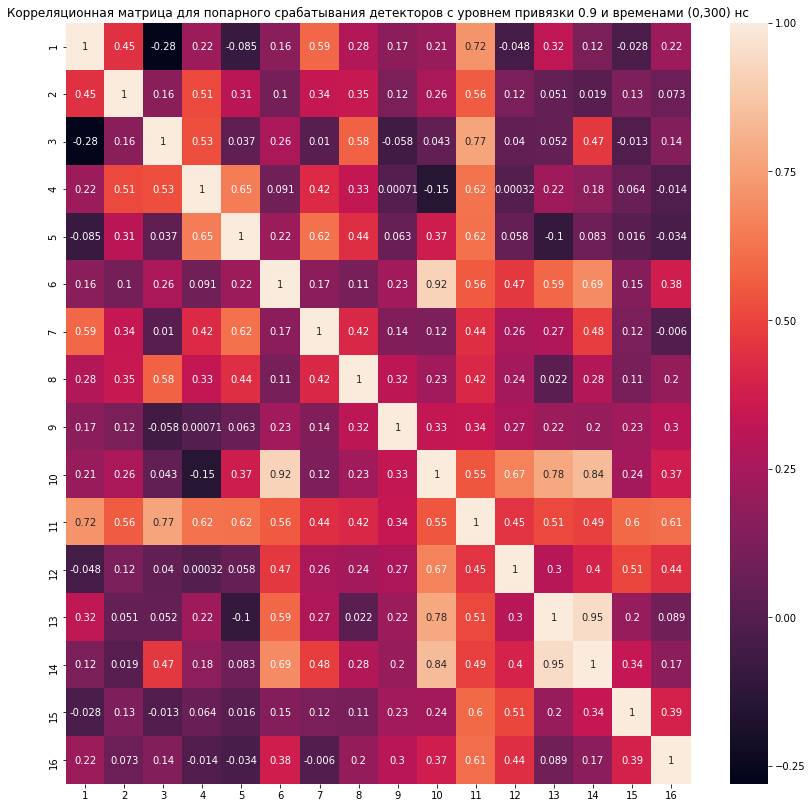

In [110]:
detectors = pd.DataFrame()
for i in range (1,17,1):
    for j in range (1,17,1):
        sovp_det = sovp1[(sovp1['det_%d' %(i)]>300) & (sovp1['det_%d' %(j)]>300)]
        detectors.loc[j,i] = stats.pearsonr(sovp_det['det_%d' %(j)], sovp_det['det_%d' %(i)])[0]
    
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14, 14))
ax = sns.heatmap(detectors, annot = True)
ax.set_title('Корреляционная матрица для попарного срабатывания детекторов с уровнем привязки 0.9 и временами (0,300) нс')

53.4162764528658


Text(0.5,1,'Корреляционная матрица для детекторов 1,5,11,15')

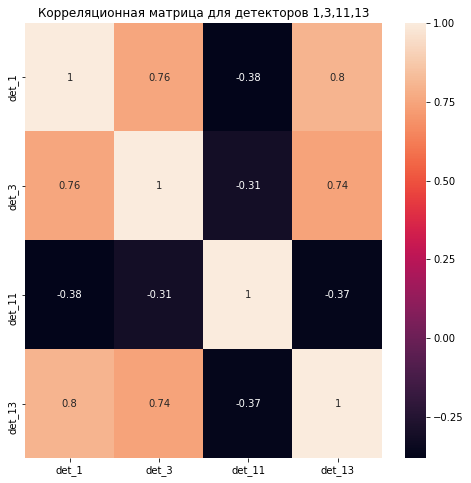

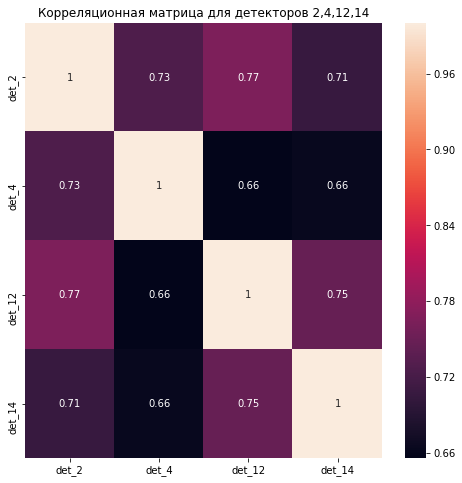

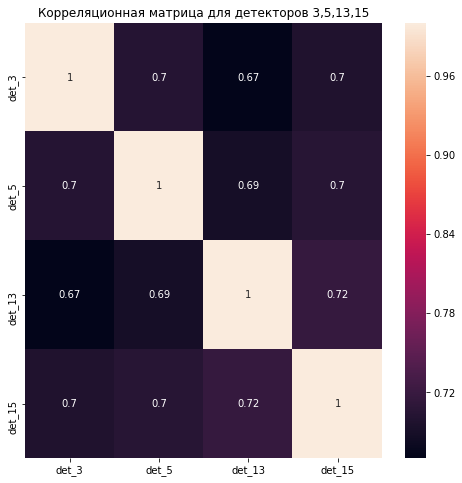

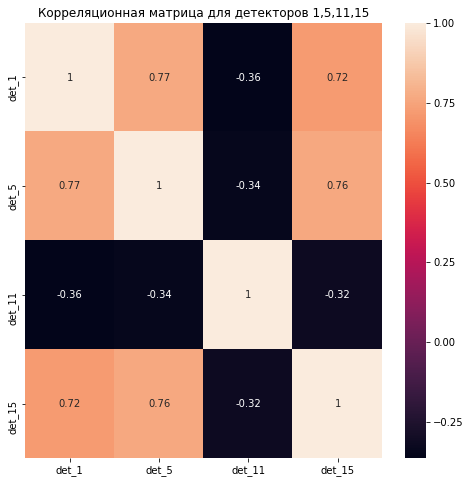

In [53]:
#Построение корреляционной матрицы для детекторов 1,3,11,13
sovp_det13 = sovp1[(sovp1['det_1']>0) & (sovp1['det_3']>0) & sovp1['det_11'] & sovp1['det_13']]
sovp_det13 = pd.DataFrame([sovp_det13['det_1'],sovp_det13['det_3'],sovp_det13['det_11'],sovp_det13['det_13']])
sovp_det13 = sovp_det13.T
uniform_data = sovp_det13.corr(method = 'pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax = sns.heatmap(uniform_data, annot = True)
ax.set_title('Корреляционная матрица для детекторов 1,3,11,13')
print(sovp1['det_1'].mean())

#Построение корреляционной матрицы для детекторов 2,4,12,14
sovp_det24 = sovp1[(sovp1['det_2']>0) & (sovp1['det_4']>0) & sovp1['det_12'] & sovp1['det_14']]
sovp_det24 = pd.DataFrame([sovp_det24['det_2'],sovp_det24['det_4'],sovp_det24['det_12'],sovp_det24['det_14']])
sovp_det24 = sovp_det24.T
uniform_data = sovp_det24.corr(method = 'pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax = sns.heatmap(uniform_data, annot = True)
ax.set_title('Корреляционная матрица для детекторов 2,4,12,14')

#Построение корреляционной матрицы для детекторов 3,5,13,15
sovp_det35 = sovp1[(sovp1['det_3']>0) & (sovp1['det_5']>0) & sovp1['det_13'] & sovp1['det_15']]
sovp_det35 = pd.DataFrame([sovp_det35['det_3'],sovp_det35['det_5'],sovp_det35['det_13'],sovp_det35['det_15']])
sovp_det35 = sovp_det35.T
uniform_data = sovp_det35.corr(method = 'pearson')
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
ax = sns.heatmap(uniform_data, annot = True)
ax.set_title('Корреляционная матрица для детекторов 3,5,13,15')

#Построение корреляционной матрицы для детекторов 1,5,11,15
sovp_det15 = sovp1[(sovp1['det_1']>0) & (sovp1['det_5']>0) & sovp1['det_11'] & sovp1['det_15']]
sovp_det15 = pd.DataFrame([sovp_det15['det_1'],sovp_det15['det_5'],sovp_det15['det_11'],sovp_det15['det_15']])
sovp_det15 = sovp_det15.T
uniform_data = sovp_det15.corr(method = 'pearson')
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(8, 8))
ax = sns.heatmap(uniform_data, annot = True)
ax.set_title('Корреляционная матрица для детекторов 1,5,11,15')

## Заполнение всех 4 разностей

In [66]:
sovp1['Razn13'] = 1000000 
sovp1['Razn24'] = 1000000 
sovp1['Razn35'] = 1000000
sovp1['Razn15'] = 1000000 


for i in tqdm(range (0, len(sovp1['date'])-1,1)):
    newdynods = sovp1.iloc[i,:]
  
    # (4-2) - (14-12)
    if ((newdynods['det_4']>0) & (newdynods['det_2']>0) & (newdynods['det_14']>0) & (newdynods['det_12']>0)):
        sovp1.iloc[i,19] = (int(newdynods['det_4']) - int(newdynods['det_2'])) - (int(newdynods['det_14']) -  int(newdynods['det_12']))

    # (3-1) - (13-11)
    if ((newdynods['det_3']>0) & (newdynods['det_1']>0) & (newdynods['det_13']>0) & (newdynods['det_11']>0)):
        sovp1.iloc[i,18] = (int(newdynods['det_3']) - int(newdynods['det_1'])) - (int(newdynods['det_13']) -  int(newdynods['det_11']))

    # (5-3) - (15-13)
    if ((newdynods['det_5']>0) & (newdynods['det_3']>0) & (newdynods['det_15']>0) & (newdynods['det_13']>0)):
        sovp1.iloc[i,20] = (int(newdynods['det_5']) - int(newdynods['det_3'])) - (int(newdynods['det_15']) -  int(newdynods['det_13']))

    # (5-1) - (15-11)
    if ((newdynods['det_5']>0) & (newdynods['det_1']>0) & (newdynods['det_15']>0) & (newdynods['det_11']>0)):
        sovp1.iloc[i,21] = (int(newdynods['det_5']) - int(newdynods['det_1'])) - (int(newdynods['det_15']) -  int(newdynods['det_11']))    

## Аппроксимация полученной разности

In [17]:
new_file_name=r"D:\prisma-16\Result\AmplRazn08.txt"
new_names=['Ev_num', 'date', 'Null', 'Razn13', 'Razn24', 'Razn35', 'Razn15']
sovp1=pd.read_csv(new_file_name, names=new_names, delim_whitespace=True)
del sovp1['Null']
sovp1['Ev_num'].astype(int)
sovp1['Razn13'].astype(int)
sovp1['Razn24'].astype(int)
sovp1['Razn35'].astype(int)
sovp1['Razn15'].astype(int)
sovp1['date'] = [datetime.strptime(sovp1['date'][n], '%Y-%m-%d') for n in range (0,len(sovp1['Razn15']),1)]

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  # Remove the CWD from sys.path while we load stuff.


[24.63760218  8.9604043   0.07466048]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.


Значение хи-квадрата 3.661023, уровень значимости 1.000000
[14.86216507 -2.33922951  0.13098233]
Значение хи-квадрата 0.782127, уровень значимости 1.000000
[13.93745214 -2.34081723  0.12865351]
Значение хи-квадрата 16.229888, уровень значимости 0.845252
[19.26549967  0.30360504  0.10099453]
Значение хи-квадрата 2.430048, уровень значимости 1.000000


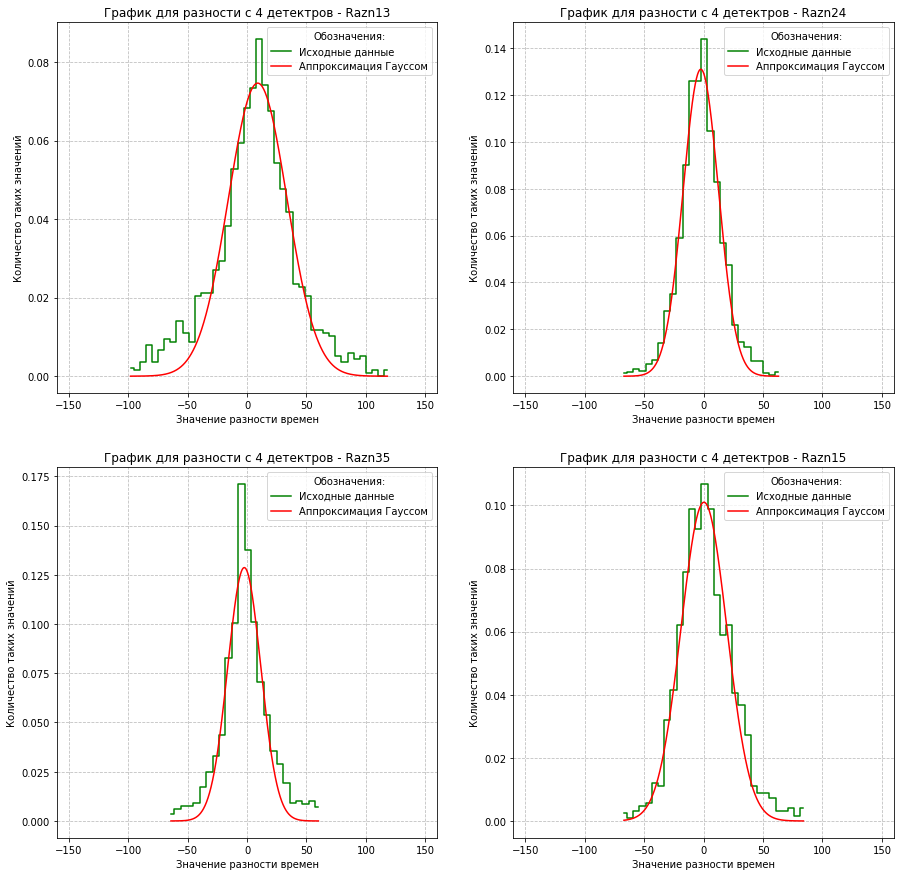

In [12]:
def func_gauss(x, sigm, mu, A):
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A

plt.figure(figsize = (15,15))
for i in range (2,6,1):
    # Базовое выделение данных - с "шумами"
    data = sovp1[(sovp1.iloc[:,i]<150) & (sovp1.iloc[:,i]>-150)].iloc[:,i]
    plt.subplot(2,2,(i-1))
    step = ((-(data.min()) + data.max())/5)
    xdata=np.linspace(data.min(), data.max(), num=step)
    ydata=(data.value_counts(normalize=False, sort=False, ascending = True, bins=step, dropna=False))
    ydata = np.array(ydata)
    xdata = np.array(xdata)
    itog = sum(ydata)
    ydata = ydata/itog
    popt, pcov = curve_fit(func_gauss, xdata, ydata, p0=[xdata.max()/10, 0, ydata.max()], method = 'lm')
    print(popt)
    
    # Итоговые данные для проверки на хи-квадрат
    data = sovp1[(sovp1.iloc[:,i]<4.5*popt[0] + popt[1]) & (sovp1.iloc[:,i]>-4.5*popt[0] + popt[1])].iloc[:,i]
    step = ((-(data.min()) + data.max())/5)
    xdata=np.linspace(data.min(), data.max(), num=step)
    ydata=(data.value_counts(normalize=False, sort=False, ascending = True, bins=step, dropna=False))
    ydata = np.array(ydata)
    xdata=np.array(xdata)
    itog = sum(ydata)
    ydata = ydata/itog
    
    #Проверка на критерий хи-квадрат
    hisqr = chisquare(ydata, func_gauss(xdata,*popt))
    print('Значение хи-квадрата %f, уровень значимости %f' %(hisqr[0], hisqr[1]))
    
    #Построение гистограммы для итоговых данных
    newx = np.linspace(data.min(), data.max(), num=1000)
    axes = plt.gca()
    axes.set_xlim([-160,160])
    #plt.legend(title = 'Обозначения:')
    plt.grid(True, linestyle='--', color='0.75')
    plt.ylabel('Количество таких значений')
    plt.xlabel('Значение разности времен')
    plt.title('График для разности с 4 детектров - %s' %(sovp1.columns.values[i]))
    plt.step(xdata, ydata, 'g', label = u'Исходные данные', where = 'mid')
    plt.plot(newx, func_gauss(newx, *popt), 'r-', label=u'Аппроксимация Гауссом')
    plt.legend(title = 'Обозначения:')

## Построение графика для 4 разностей

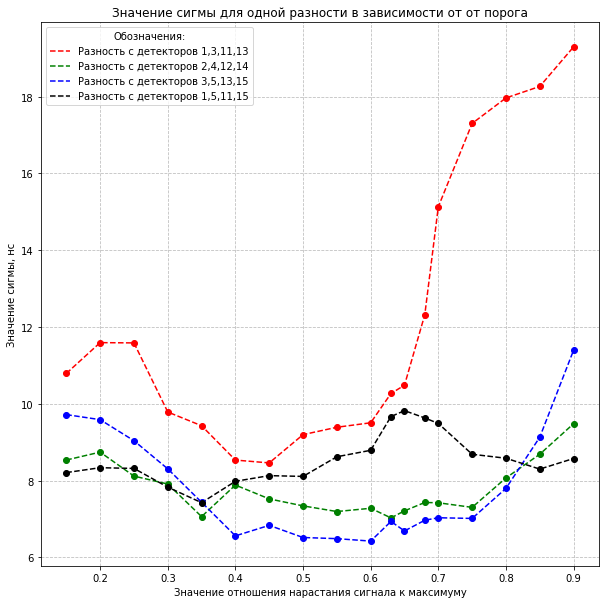

In [14]:
x1 = np.array([21.58198463/2, 23.18646989/2, 23.17166605/2, 19.57386026/2, 18.85849265/2, 17.07049636/2, 16.92293562/2, 18.39477247/2, 18.77971705/2, 19.01222037/2, 20.53777771/2, 20.96894581/2, 24.63760218/2, 30.26224241/2, 34.60110612/2, 35.92774446/2, 36.52649637/2, 38.58519301/2])
x2 = np.array([17.07341849/2, 17.484634/2, 16.23669498/2, 15.82260322/2, 14.12657483/2, 15.77032801/2, 15.04896132/2,  14.68524461/2, 14.39096747/2, 14.56025573/2, 14.05990554/2, 14.4259825/2, 14.86216507/2, 14.84728512/2, 14.60774514/2, 16.13995229/2, 17.37407094/2, 18.96549906/2])
x3 = np.array([19.43745227/2, 19.17549893/2, 18.07959913/2, 16.61318768/2, 14.87303333/2, 13.12365955/2, 13.6714442/2, 13.03824761/2, 12.97910573/2, 12.85178867/2, 13.87561205/2,	13.37989647/2, 13.93745214/2, 14.06708054/2, 14.03180875/2, 15.59492729/2, 18.26130203/2, 22.79264809/2])
x4 = np.array([16.41957652/2, 16.67338956/2, 16.6362207/2, 15.66095771/2, 14.85194208/2, 15.96535322/2, 16.26032685/2, 16.21953933/2, 17.24358393/2, 17.57894623/2, 19.33601979/2,	19.64495583/2, 19.26549967/2, 18.9770151/2, 17.37315173/2, 17.16587227/2, 16.60108655/2, 17.15221273/2])
y = np.array([0.15, 0.2, 0.25, 0.30, 0.35, 0.40, 0.45, 0.50, 0.55, 0.60, 0.63, 0.65, 0.68, 0.70, 0.75, 0.80, 0.85, 0.90])

plt.figure(1, figsize = (10,10))
plt.plot(y, x1, 'r--',  label = 'Разность с детекторов 1,3,11,13')
plt.plot(y, x2, 'g--', label = 'Разность с детекторов 2,4,12,14')
plt.plot(y, x3, 'b--', label = 'Разность с детекторов 3,5,13,15')
plt.plot(y, x4, 'k--', label = 'Разность с детекторов 1,5,11,15')
plt.plot(y, x1, 'ro')
plt.plot(y, x2, 'go')
plt.plot(y, x3, 'bo')
plt.plot(y, x4, 'ko')
plt.title('Значение сигмы для одной разности в зависимости от от порога')
plt.legend(title = 'Обозначения:')
plt.xlabel('Значение отношения нарастания сигнала к максимуму')
plt.ylabel('Значение сигмы, нс')
plt.grid(True, linestyle='--', color='0.75')

## Построение хи-квадрата

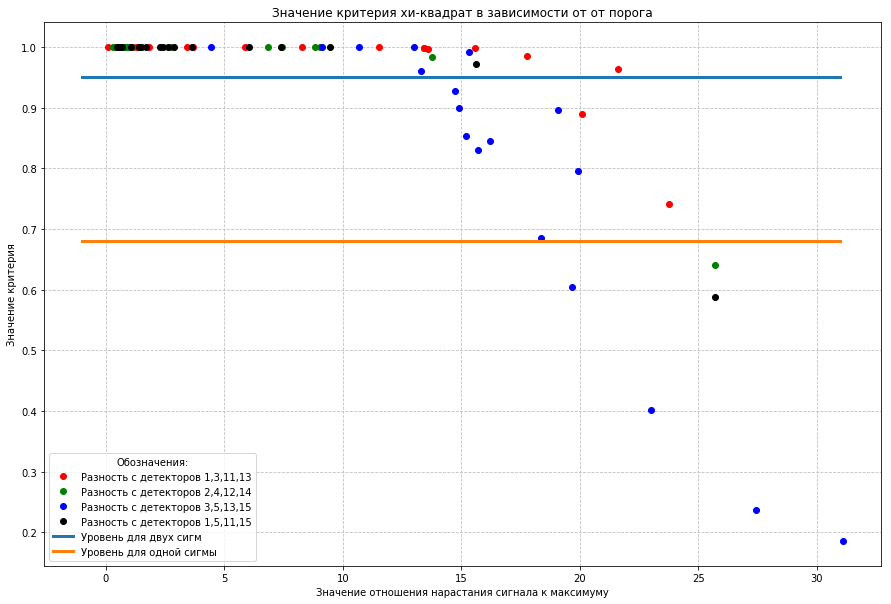

In [16]:
x1 = np.array([8.280568 , 3.405947,  5.872062,  11.530736, 13.437887, 23.767412, 20.092172, 13.607599, 13.448195, 17.792016, 15.594544, 21.604317, 3.661023, 1.086519,  1.290167,  0.105553,  1.387781, 1.810456])
x2 = np.array([25.721698, 9.019844,  13.760472, 6.858482,  7.423671,  0.743759,  0.303359,  0.413760,  0.823203,  1.504183, 1.090119, 0.884511, 0.782127, 1.007562,  1.038206,  2.752252,  1.465248, 8.824832])
x3 = np.array([12.986432, 10.697063, 15.323807, 19.081523, 31.110585, 23.003828, 27.458068, 15.708606, 18.356503, 15.197071, 14.884018, 19.652751, 16.229888,	14.751717, 13.297840, 19.926495, 9.130838, 4.431014])
x4 = np.array([25.725043, 15.611224, 9.465182,  7.386191,  3.635257,  1.687127,  1.073238,  0.579065,  0.662514,  0.577003, 0.454410, 1.403023, 2.430048, 1.467217,  2.885688,  2.280013,  2.620714, 6.057327])

y1 = np.array([1.000000, 1.000000, 1.000000, 0.999807, 0.998386, 0.740315, 0.890039, 0.997127, 0.998374, 0.985725, 0.998118, 0.962913, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000])
y2 = np.array([0.640321, 0.999925, 0.983485, 0.999938, 0.999517, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999984])
y3 = np.array([0.999297, 0.999918, 0.991668, 0.895602, 0.185383, 0.401513, 0.236971, 0.830080, 0.684654, 0.853643, 0.898742, 0.604751, 0.845252, 0.927814, 0.960955, 0.795027, 0.999954, 1.000000])
y4 = np.array([0.588155, 0.971234, 0.999588, 0.999934, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 1.000000, 0.999996])

plt.figure(1, figsize = (15,10))
plt.plot(x1, y1, 'ro',  label = 'Разность с детекторов 1,3,11,13')
plt.plot(x2, y2, 'go', label = 'Разность с детекторов 2,4,12,14')
plt.plot(x3, y3, 'bo', label = 'Разность с детекторов 3,5,13,15')
plt.plot(x4, y4, 'ko', label = 'Разность с детекторов 1,5,11,15')
#plt.plot(x1, y1, 'r--')
#plt.plot(x2, y2, 'g--')
#plt.plot(x3, y3, 'b--')
#plt.plot(x4, y4, 'k--')
plt.plot([-1,31],[0.95,0.95],'-', linewidth  = 3, label = 'Уровень для двух сигм')
plt.plot([-1,31],[0.68,0.68],'-', linewidth  = 3, label = 'Уровень для одной сигмы')
plt.plot()
plt.title('Значение критерия хи-квадрат в зависимости от от порога')
plt.legend(title = 'Обозначения:')
plt.xlabel('Значение отношения нарастания сигнала к максимуму')
plt.ylabel('Значение критерия')
plt.grid(True, linestyle='--', color='0.75')


## Запись в файл полученные значения для разностей с прикрепленным рисунком

In [11]:
new_name=r"D:\prisma-16\Result\AmplRazn068.txt"
found = open(new_name, 'w+')

for j in tqdm(range (0, len(sovp1['date'])-1, 1)):
    symbol = sovp1.iloc[j, :]
    sym_wri = ''
    
    for i in range (0,len(symbol),1):
        sym_wri = sym_wri + str(sovp1.iloc[j, i]) + ' '
    found.write(str(sym_wri)+'\n')
    
found.close()  

## Поиск числа событий с некоторым заданным числом сработавших детекторов

In [217]:
vsego = 0
for j in tqdm(range(0, len(sovp1['date']) - 1,1)):
    detector = dynods[dynods['date'] == sovp1.iloc[j,1]][dynods['Ev_num'] == sovp1.iloc[j,0]]
    if (len(detector['date']) == 2):
        vsego = vsego + 1
        #print('Число сработавших детекторов %d' %(len(detector['date'])))
        #print(sovp1.iloc[i,:])
        #print('--------------------------------------------------')
print(vsego)        

A Jupyter Widget

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until



4048


## Построение графиков зависимостей коэффициента отношения сигналов с 8 и 5 динодов. Relation

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[  0.4413548    9.46641928  42.27231028]


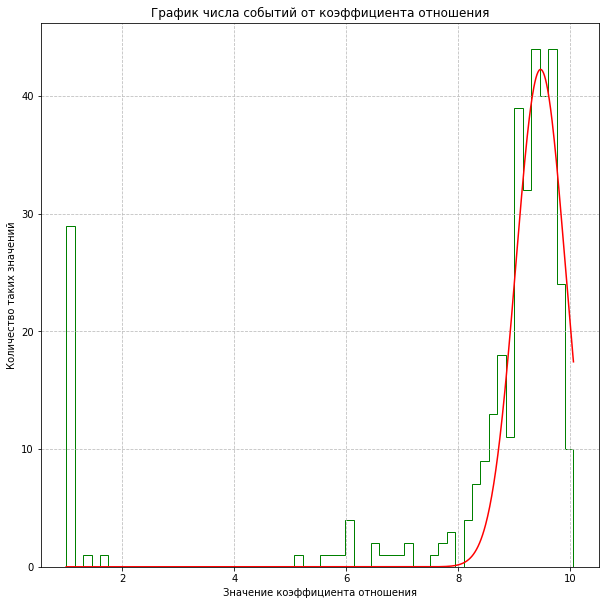

In [47]:
def func_gauss(x, sigm, mu, A):
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A


plt.figure(1, figsize = (10,10))
# Построение аппроксимации
xdata=np.linspace(dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].min(), dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].max(), num=60)
ydata=(dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].value_counts(normalize=False, sort=False, ascending = True, bins=60, dropna=False))
ydata=np.array(ydata)
xdata=np.array(xdata)

# Аппроксимация данных
popt, pcov = curve_fit(func_gauss, xdata, ydata, p0=[xdata.max()/10, xdata.max()/2, ydata.max()], method = 'lm')
newx = np.linspace(dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].min(), dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].max() , num=1000)
plt.plot(newx, func_gauss(newx, *popt), 'r-', label='fit')

# Построение гистограммы
dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].plot(kind='hist', range = (dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].min(), dynods[dynods['date']>'2018-01-01'][dynods['det_num'] == 1]['Relation'].max()), bins = 60, color='g',histtype = 'step', cumulative = 0)
plt.grid(True, linestyle='--', color='0.75')
plt.ylabel('Количество таких значений')
plt.xlabel('Значение коэффициента отношения')
plt.title('График числа событий от коэффициента отношения')
print(popt)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


[  0.46217479   9.43572813  23.5005022 ]


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


[ -4.06438224  32.84096288   0.51416059]
[  0.67613929  15.3708531   17.40964556]
[  0.32795093   8.72787759  19.87059641]
[  0.32356858   8.41912735  19.72814813]
[  1.08516504  22.14251108   3.67565792]
[  0.44647638  11.79286042  13.48240231]
[  0.44659681  10.44089628   9.92041265]
[ -4.3702666   21.24867203   0.63145649]
[ 0.4362231   9.23792552  7.38114842]
[ -1.53107166  15.79599772   5.42742624]
[ -4.36037911  28.59124897   1.13060988]
[ -3.13592385e-02   5.51188584e+00   3.53504434e+01]
[  0.44509619  12.16391399  13.89896372]
[  0.73675374  13.94932615  15.52965476]
[ -4.20401649  21.13454704   3.9130451 ]


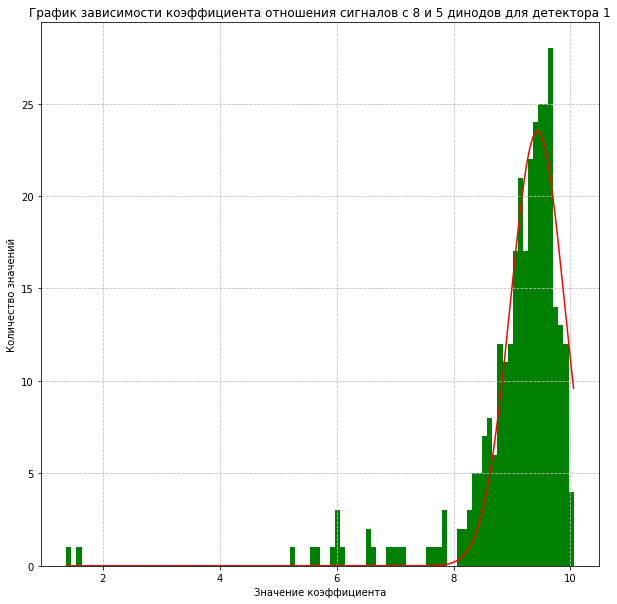

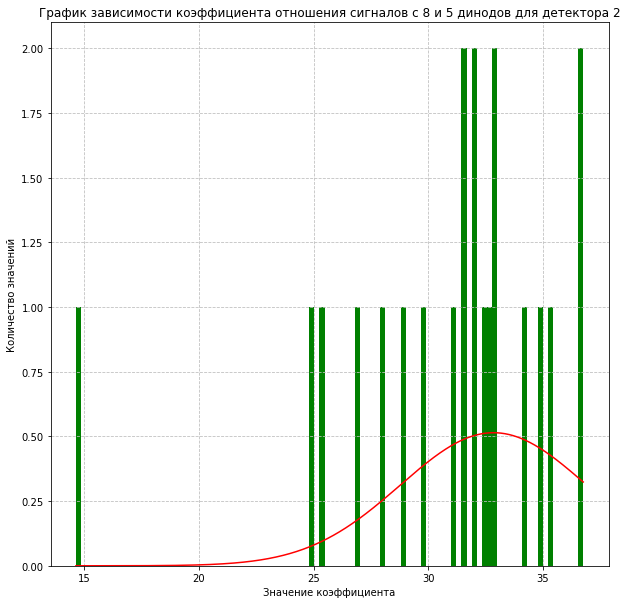

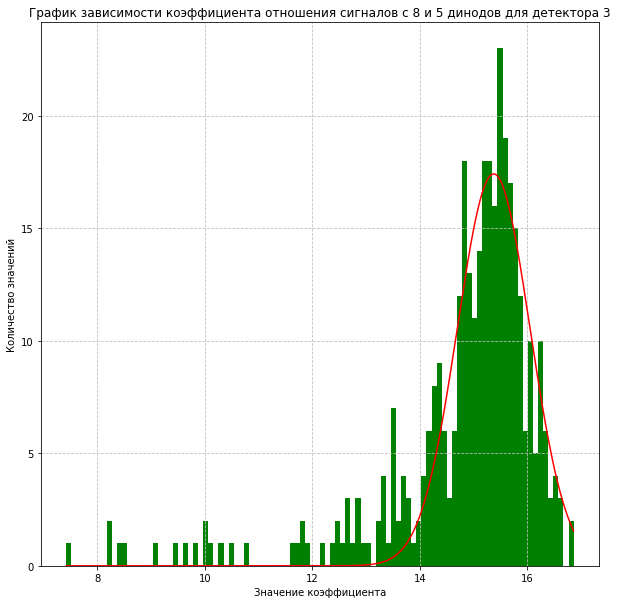

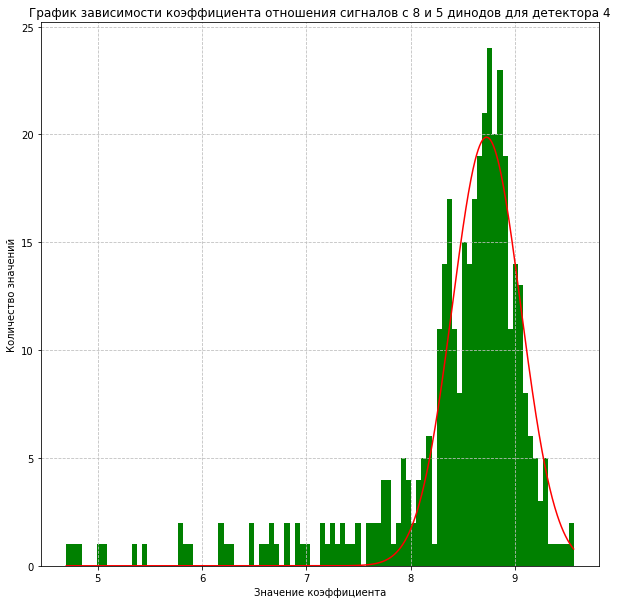

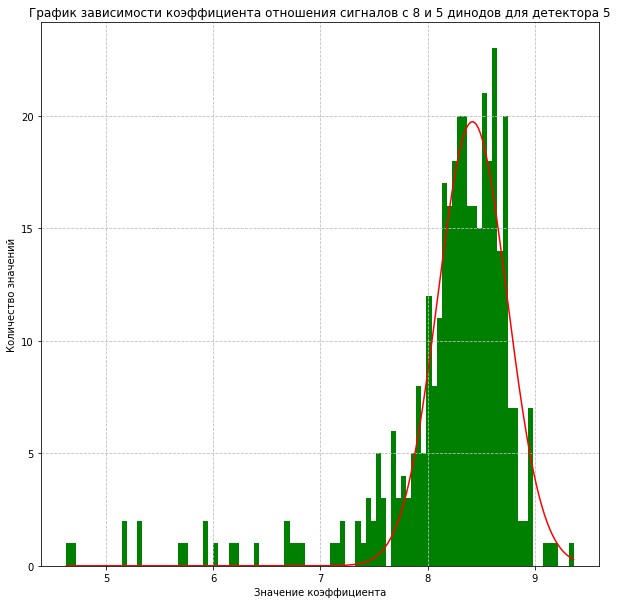

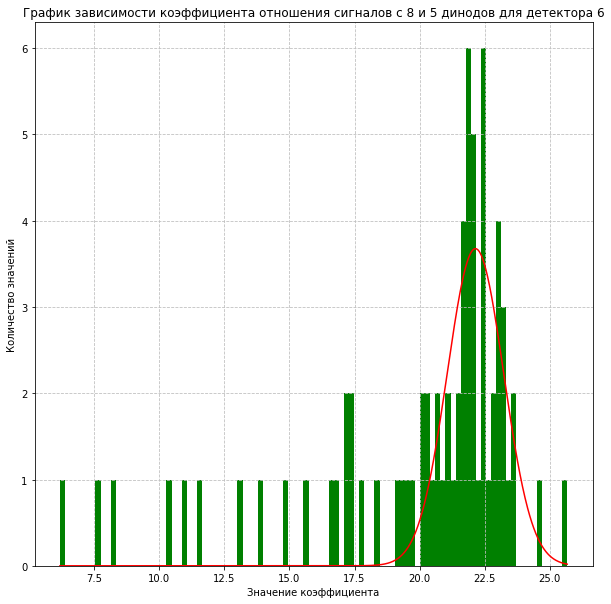

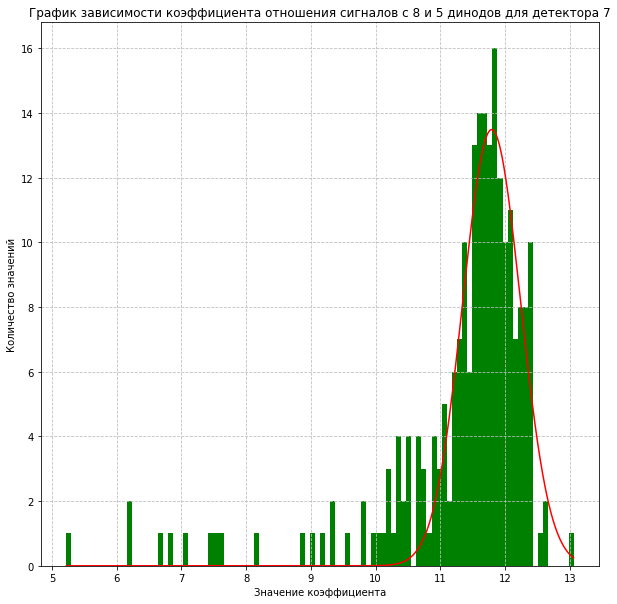

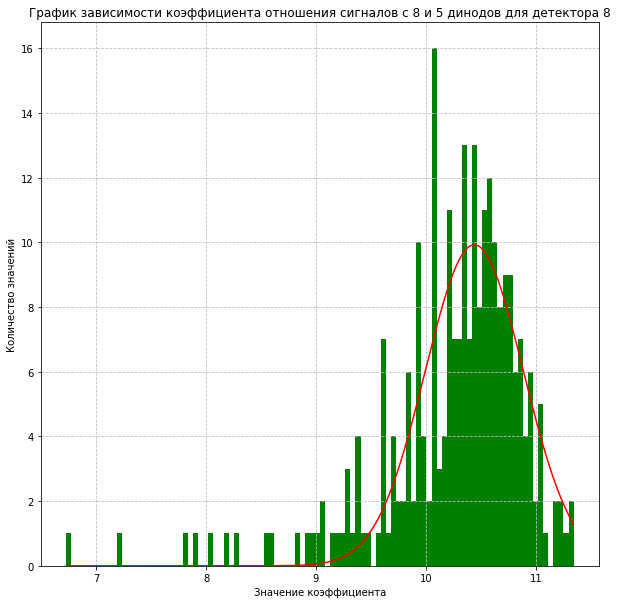

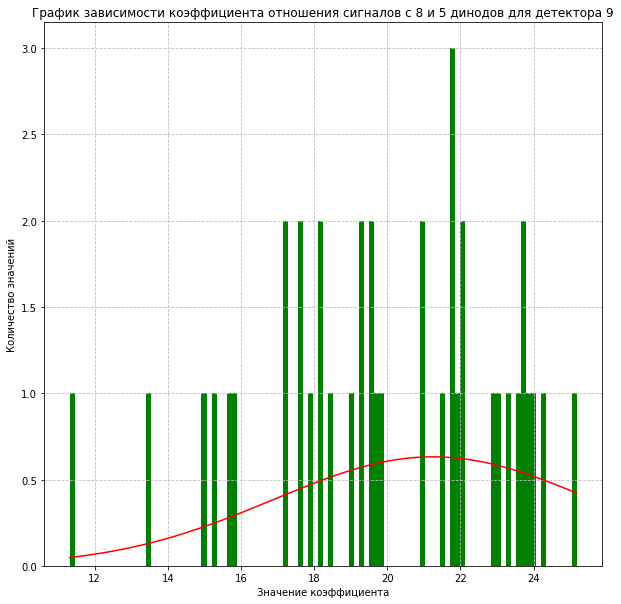

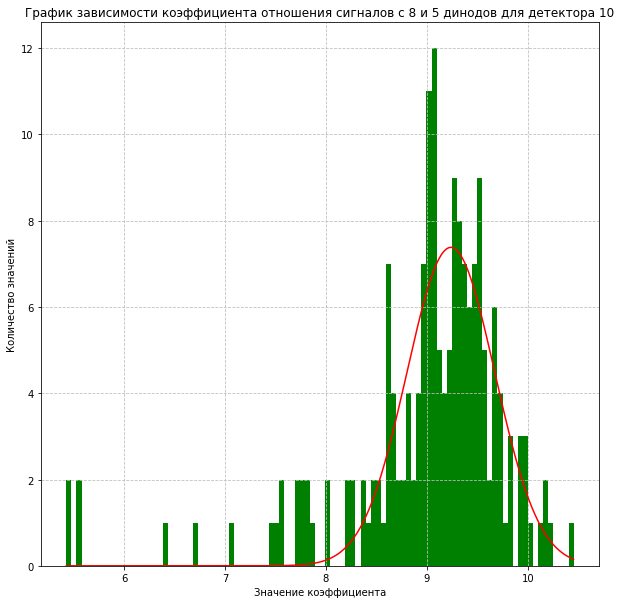

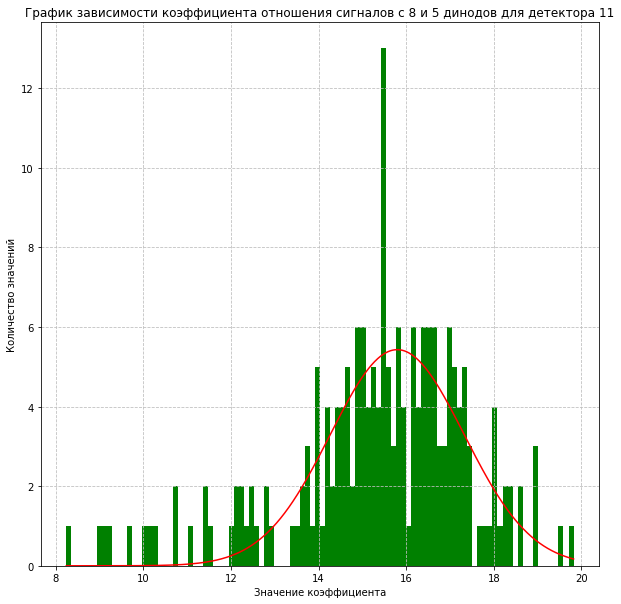

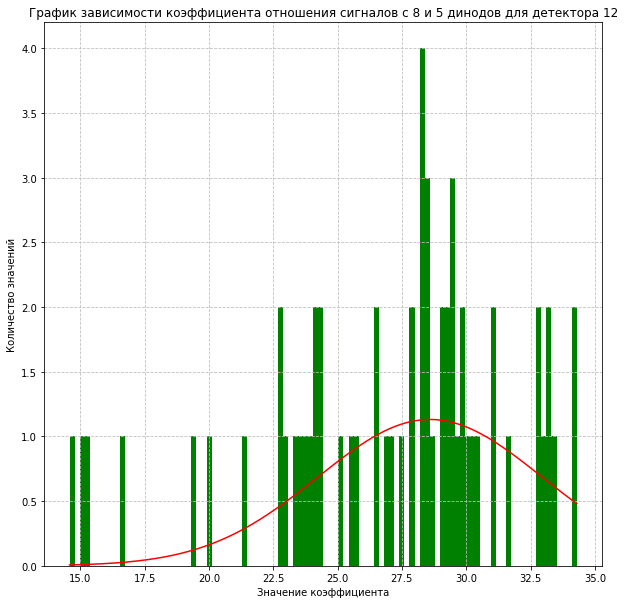

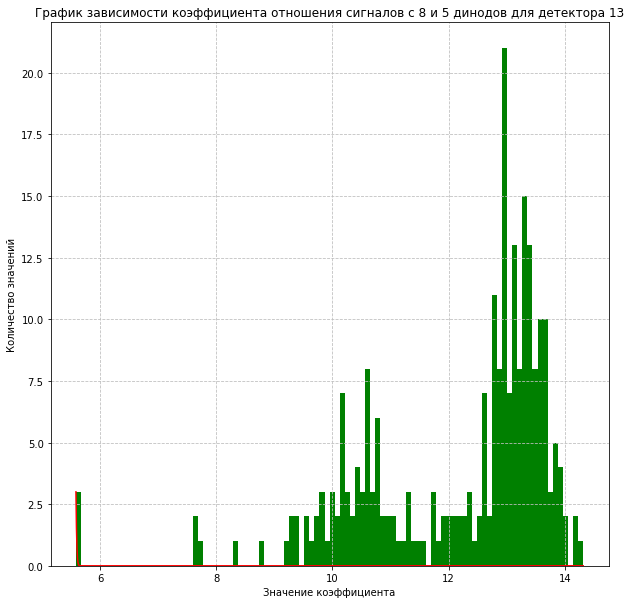

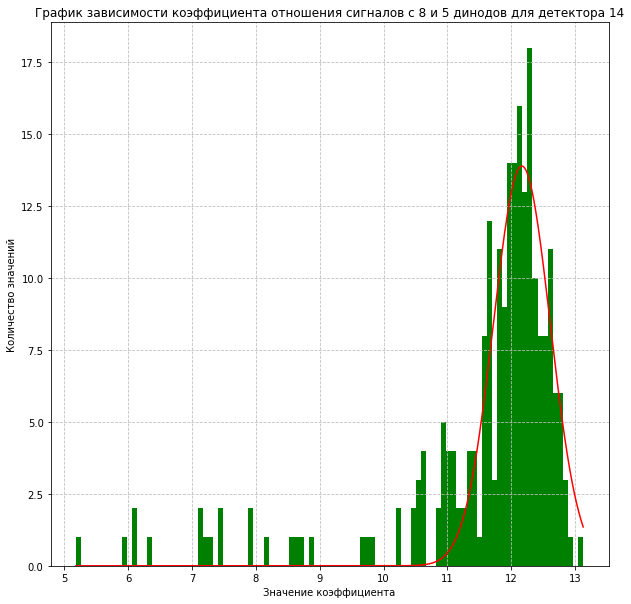

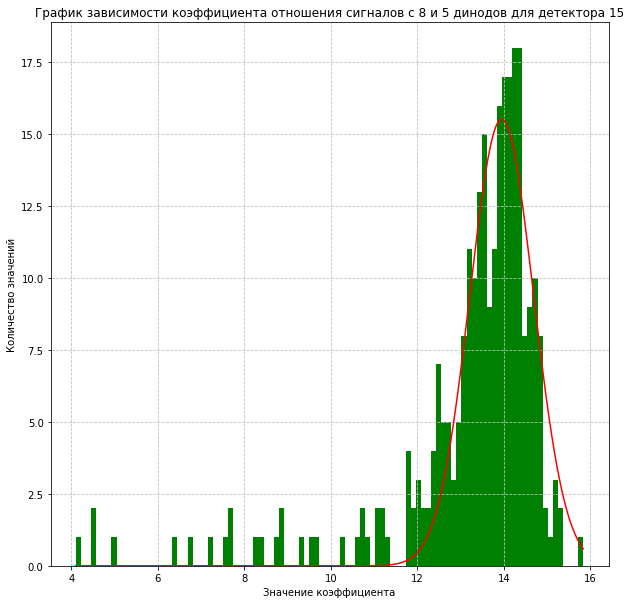

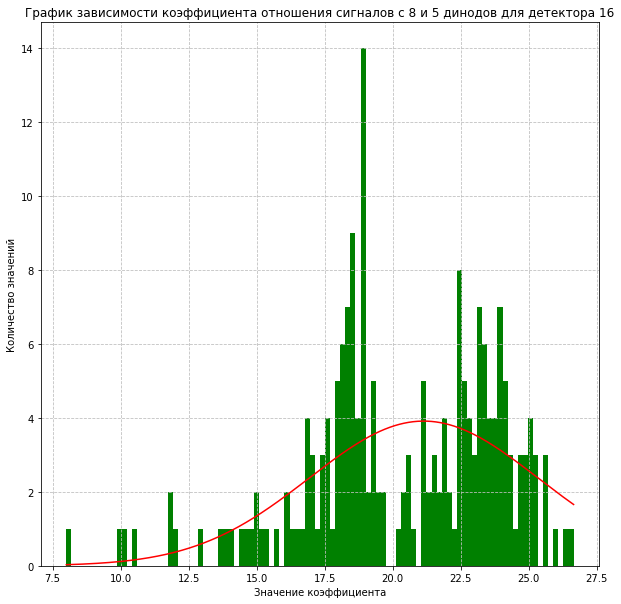

In [91]:
def func_gauss(x, sigm, mu, A):
    #return (1/((2*PI*sigm**2)**(1/2)) * np.exp(-((x-mu)**2)/(2*sigm**2)))*A
    return np.exp(-((x-mu)**2)/(2*sigm**2))*A

for i in range (1,17,1):
    plt.figure(i, figsize = (10,10))
    xdata=np.linspace(dynods[dynods['det_num'] == i][dynods['Ampl_5']<dynods['Ampl_8']][dynods['date'] > '2018-01-01'][dynods['Ampl_5']<dynods['Ampl_8']]['Relation'].min(), dynods[dynods['det_num'] == i][dynods['date'] > '2017-12-30'][dynods['Ampl_5']<dynods['Ampl_8']]['Relation'].max(), num=100)
    ydata=           (dynods[dynods['det_num'] == i][dynods['Ampl_5']<dynods['Ampl_8']][dynods['date'] > '2018-01-01']['Relation'].value_counts(normalize=False, sort=False, ascending =True, dropna=False, bins = 100))
    ydata=np.array(ydata)
    xdata=np.array(xdata)
    
    popt, pcov = curve_fit(func_gauss, xdata, ydata, p0=[xdata.max()/10, xdata.max()/2, ydata.max()], method = 'lm') 
    print(popt)
    newx = np.linspace(dynods[dynods['det_num'] == i][dynods['date'] > '2018-01-01']['Relation'].min(), dynods[dynods['det_num'] == i][dynods['date'] > '2017-12-30']['Relation'].max(), num=1000)
    plt.plot(newx, func_gauss(newx, *popt), 'r-', label='fit')
    
    dynods[dynods['det_num'] == i][dynods['date'] > '2018-01-01']['Relation'].plot(kind='hist',color='g', bins=100, range = (dynods[dynods['det_num'] == i][dynods['Ampl_5']<dynods['Ampl_8']][dynods['date'] > '2018-01-01'][dynods['Ampl_5']<dynods['Ampl_8']]['Relation'].min() , dynods[dynods['det_num'] == i][dynods['Ampl_5']<dynods['Ampl_8']][dynods['date'] > '2018-01-01'][dynods['Ampl_5']<dynods['Ampl_8']]['Relation'].max()),histtype='stepfilled', orientation = 'vertical')
    plt.grid(True, linestyle='--', color='0.75')
    plt.ylabel('Количество значений')
    plt.xlabel('Значение коэффициента')
    plt.title('График зависимости коэффициента отношения сигналов с 8 и 5 динодов для детектора %d' %i) 

## Построение графиков зависимостей времени, при котором наблюдается половина максимума

[  -61.40434131   224.66621552 34221.65889317]
[  -63.76231021   217.43696277 28558.23798421]
[  -59.07905729   221.31532542 39314.64681817]
[   53.88580718   238.90675582 34251.96467763]
[  -63.46958538   215.86362788 36230.52328142]
[  -82.68484303   222.26754313 36285.14801747]
[   72.1688781    173.04764301 60405.82759133]
[   63.36109929   233.90180642 36114.98505515]
[   64.17564574   247.34241908 32068.24852103]
[   79.34039933   174.33471429 55859.94389224]
[  -35.98006329   255.17457086 26752.89369533]
[   67.29875621   246.21370974 39924.98775022]
[   70.12331232   224.92505375 40238.59888828]
[  -241.92766391    423.02706938 119678.74668916]
[   64.81978531   230.22501813 38347.83322019]
[   54.8376361    246.15635277 33206.19945206]


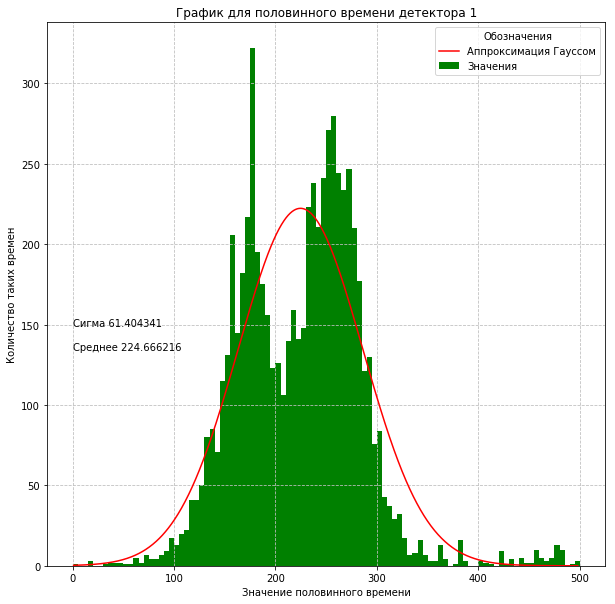

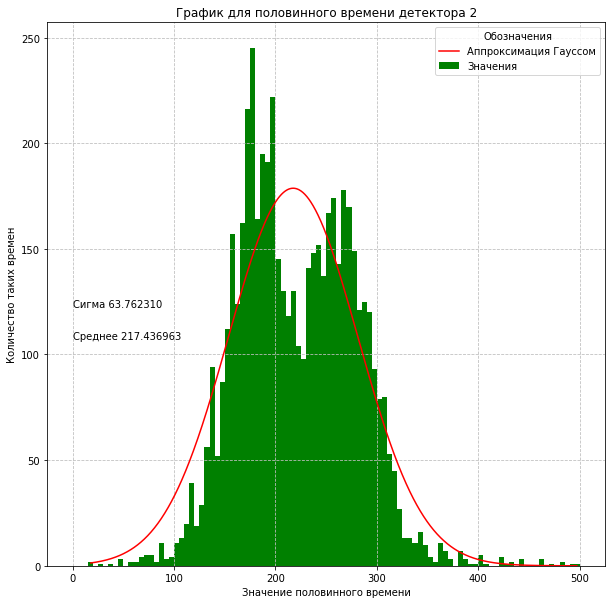

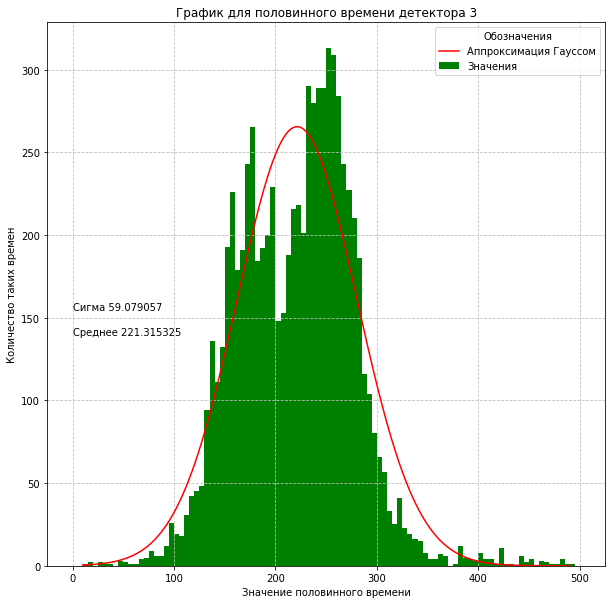

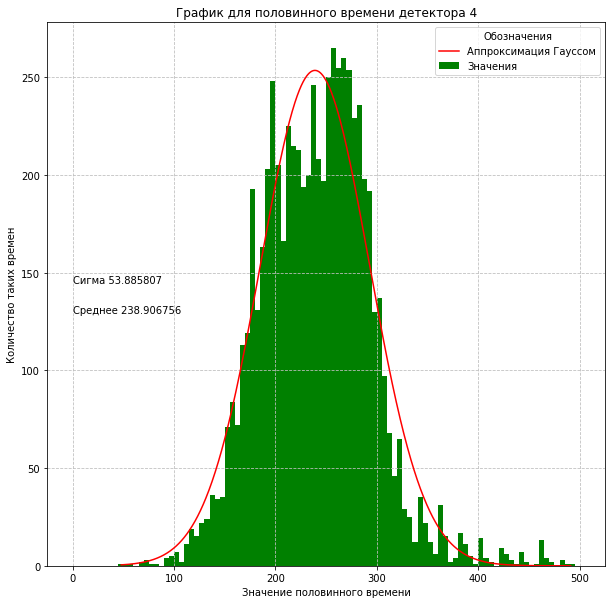

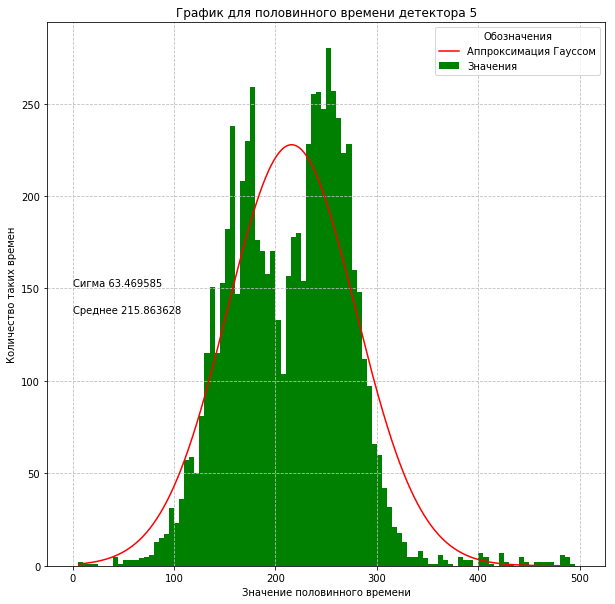

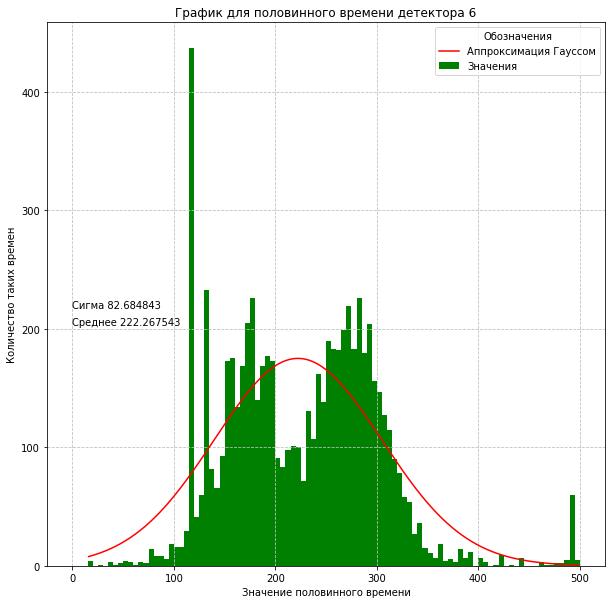

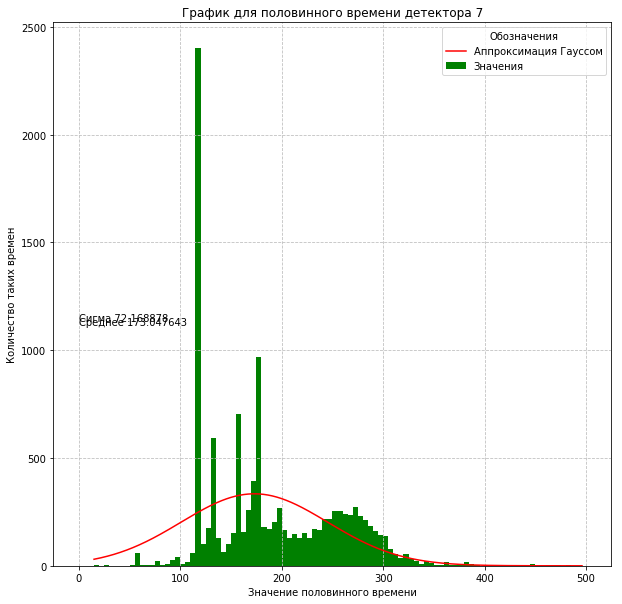

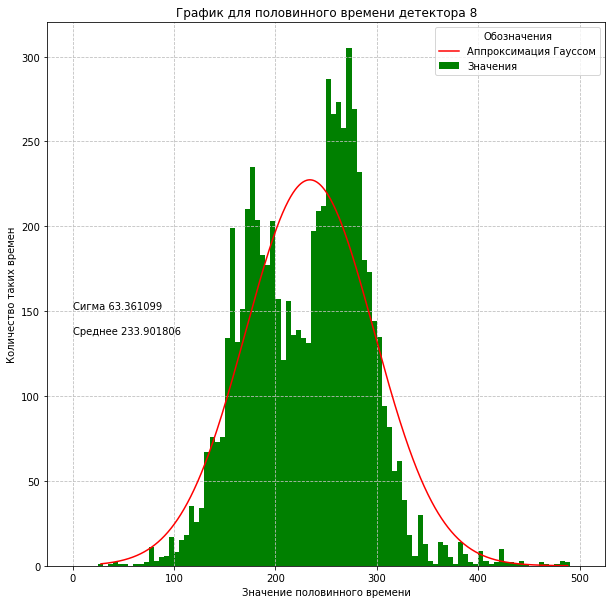

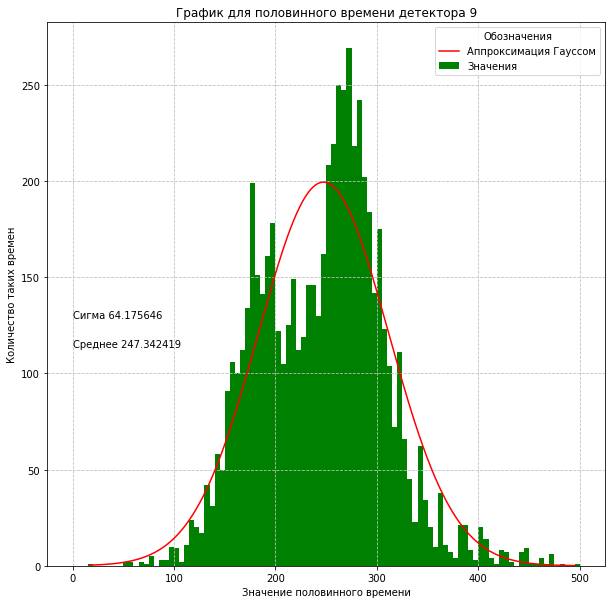

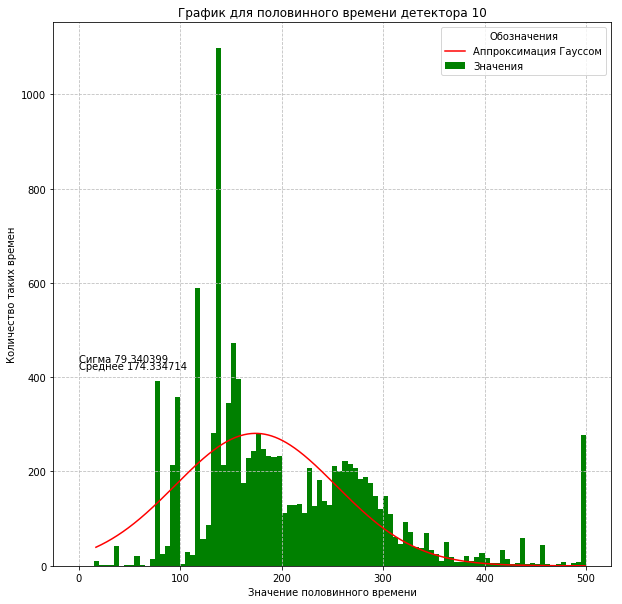

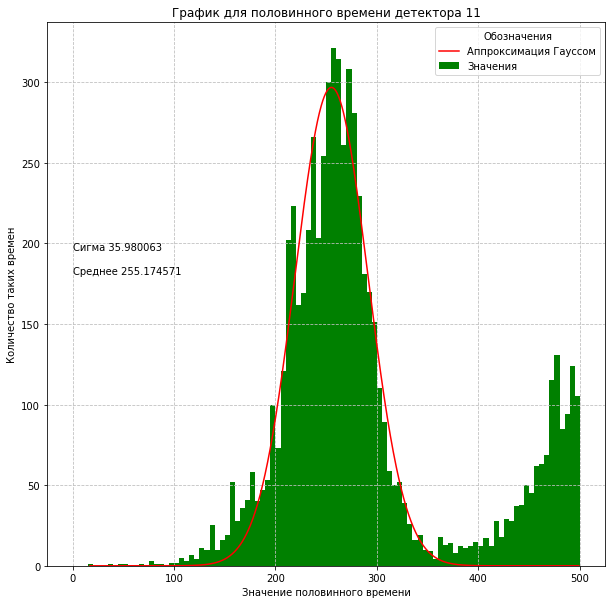

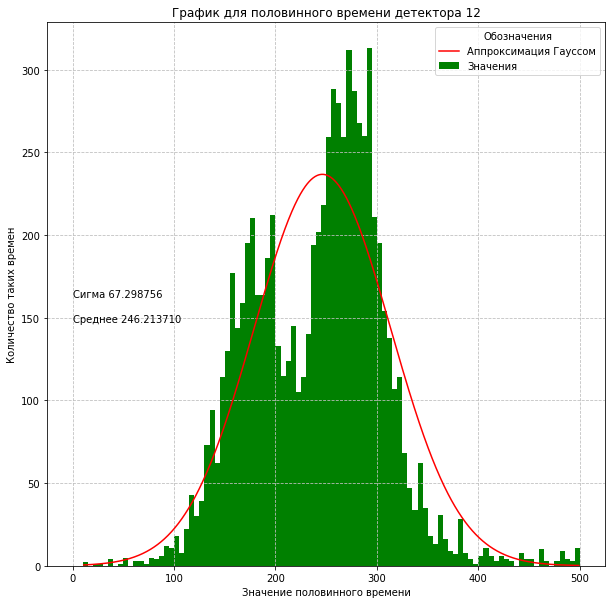

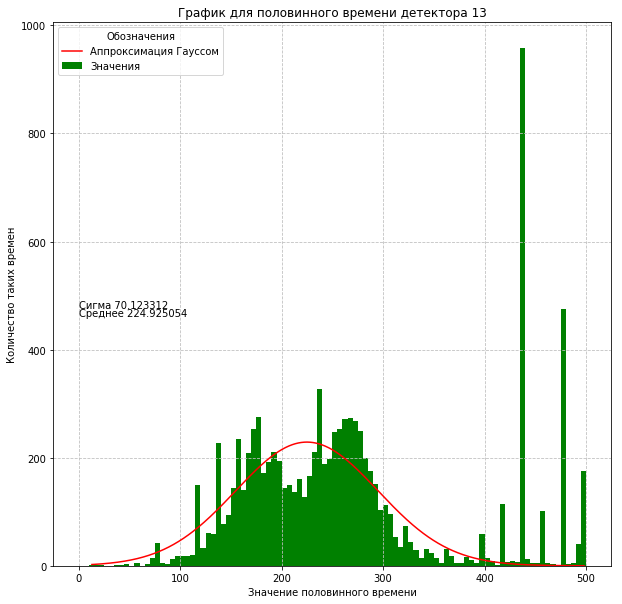

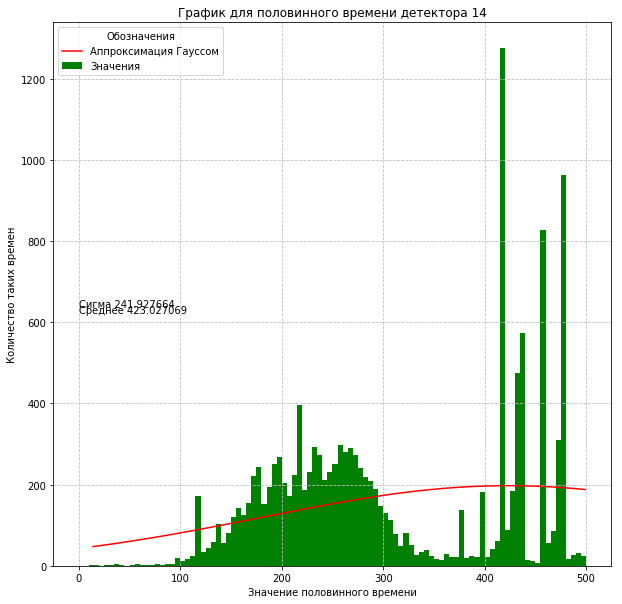

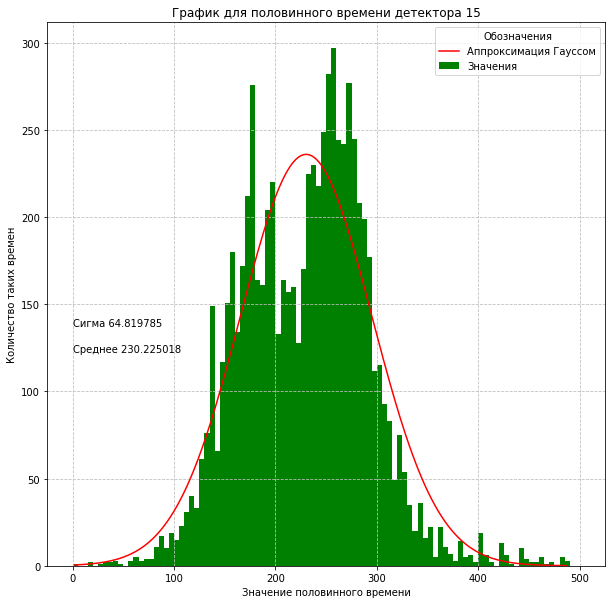

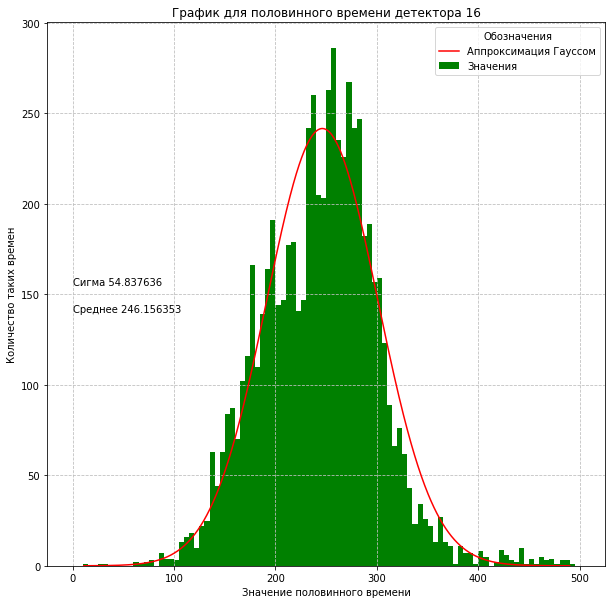

In [63]:
def func_gauss(x, sigm, mu, A):
    return (1/((2*PI*sigm**2)**(1/2)) * np.exp(-((x-mu)**2)/(2*sigm**2)))*A
    #return np.exp(-((x-mu)**2)/(2*sigm**2))*A

for i in range (1,17,1):
    plt.figure(i, figsize = (10, 10))
    plt.subplot(1,1,1)
    step =       int((dynods[dynods['det_num'] == i]['Half_time'].max() - dynods[dynods['det_num'] == i]['Half_time'].min()) / 5)
    xdata=np.linspace(dynods[dynods['det_num'] == i]['Half_time'].min(), dynods[dynods['det_num'] == i]['Half_time'].max(), num=step)
    ydata=           (dynods[dynods['det_num'] == i]['Half_time'].value_counts(normalize=False, sort=False, ascending =True, bins=step, dropna=False))
    ydata=np.array(ydata)
    popt, pcov = curve_fit(func_gauss, xdata, ydata, p0=[xdata.max()/10, xdata.max()/2, ydata.max()], method = 'lm')
    print(popt)
    newx = np.linspace(dynods[dynods['det_num'] == i]['Half_time'].min(), dynods[dynods['det_num'] == i]['Half_time'].max(), num=1000)
    plt.plot(newx, func_gauss(newx, *popt), 'r-', label=u'Аппроксимация Гауссом')
    dynods[dynods['det_num'] == i]['Half_time'].plot(kind='hist', range = (0, 500), bins=100,color='g', label = u'Значения', cumulative = 0, histtype = 'barstacked')
    plt.grid(True, linestyle='--', color='0.75')                                    
    plt.ylabel('Количество таких времен')
    plt.xlabel('Значение половинного времени')
    plt.title('График для половинного времени детектора %d' %i)
    plt.legend(title='Обозначения')
    plt.text(0,ydata.max()/2, 'Сигма %f' %(math.fabs(popt[0])))
    plt.text(0,ydata.max()/2-15, 'Среднее %f' %(popt[1]))

## Построение графика зависимости амплитуд сигнала с 8 динода от 5 для детекторов 

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


Коэффициенты аппроксимации для детектора 1: x*9.066284 + 6.481077
Коэффициенты аппроксимации для детектора 2: x*26.917691 + 88.273047
Коэффициенты аппроксимации для детектора 3: x*14.297784 + 21.727680
Коэффициенты аппроксимации для детектора 4: x*8.103806 + 14.838107
Коэффициенты аппроксимации для детектора 5: x*8.001468 + 10.530103
Коэффициенты аппроксимации для детектора 6: x*14.626803 + 132.193981
Коэффициенты аппроксимации для детектора 7: x*10.919961 + 15.268937
Коэффициенты аппроксимации для детектора 8: x*10.652917 + -4.879148
Коэффициенты аппроксимации для детектора 9: x*12.339334 + 190.292835
Коэффициенты аппроксимации для детектора 10: x*8.981402 + 5.946556
Коэффициенты аппроксимации для детектора 11: x*14.514840 + 35.323689
Коэффициенты аппроксимации для детектора 12: x*24.047554 + 105.089005
Коэффициенты аппроксимации для детектора 13: x*12.122651 + 10.882759
Коэффициенты аппроксимации для детектора 14: x*10.873632 + 31.694389
Коэффициенты аппроксимации для детектора 15: x

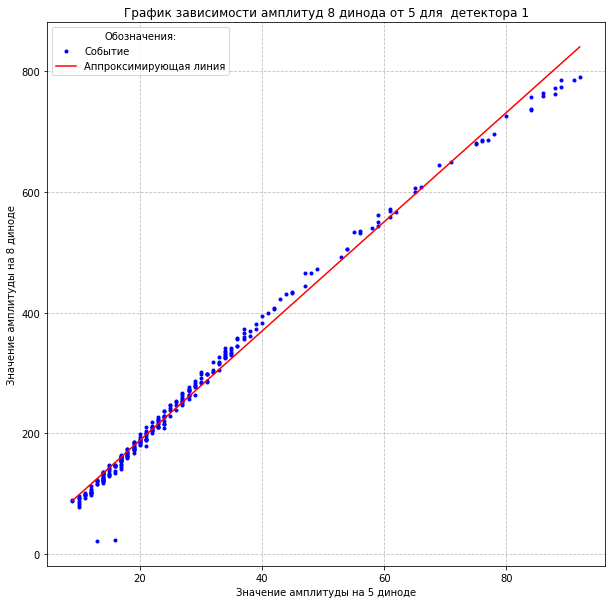

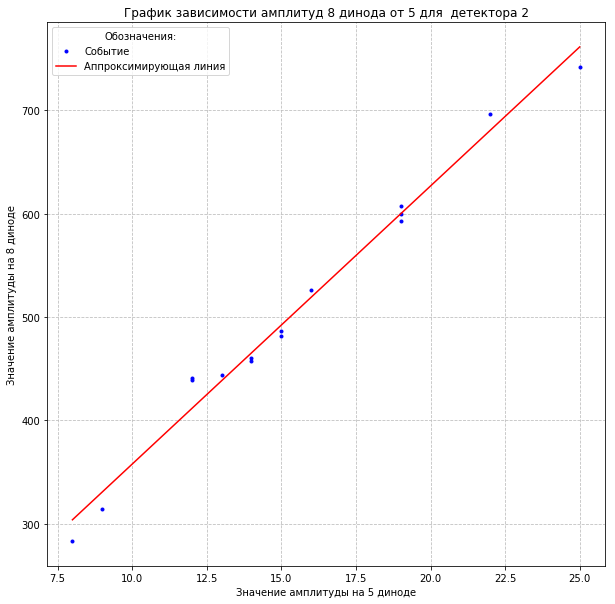

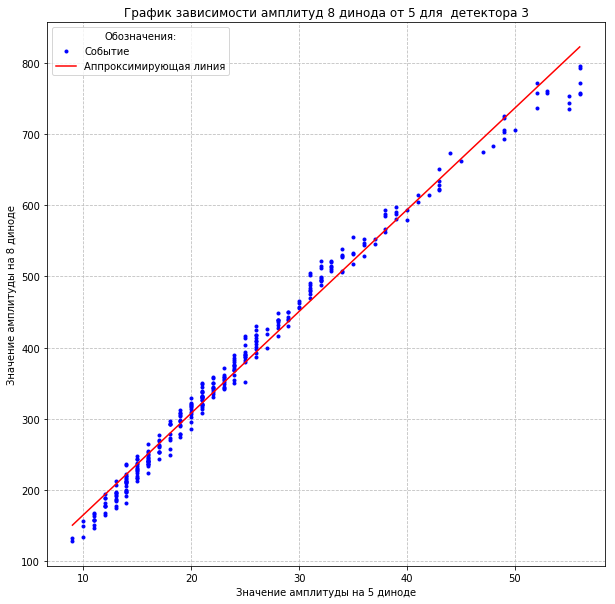

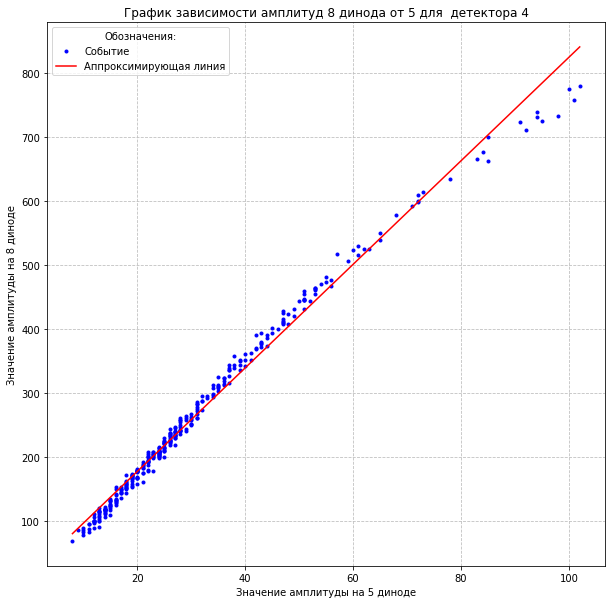

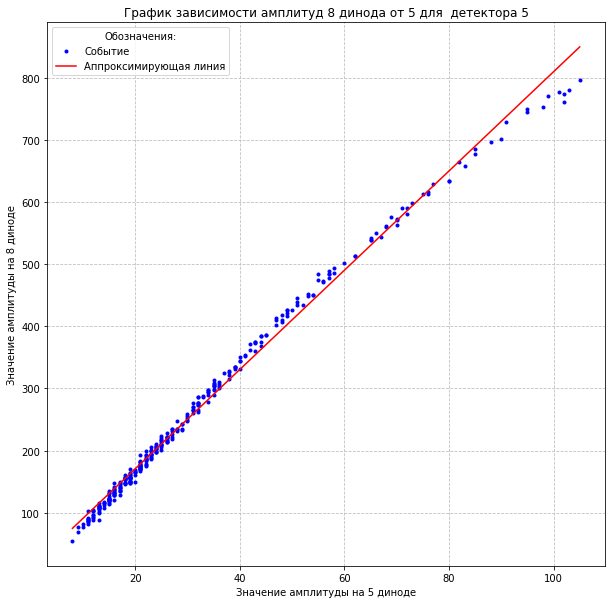

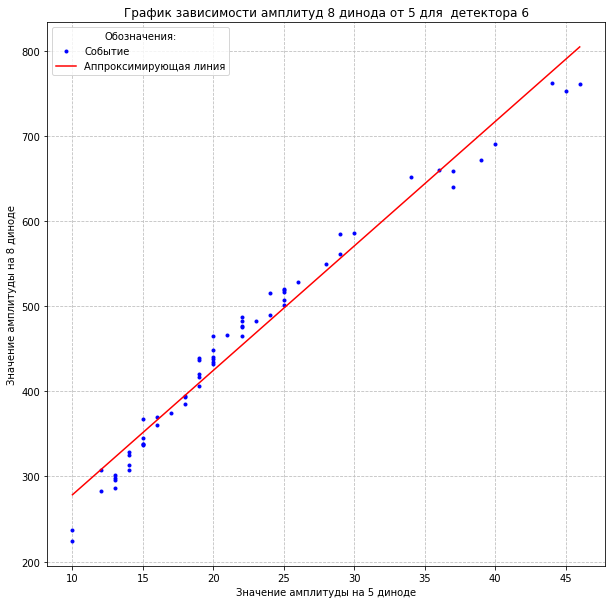

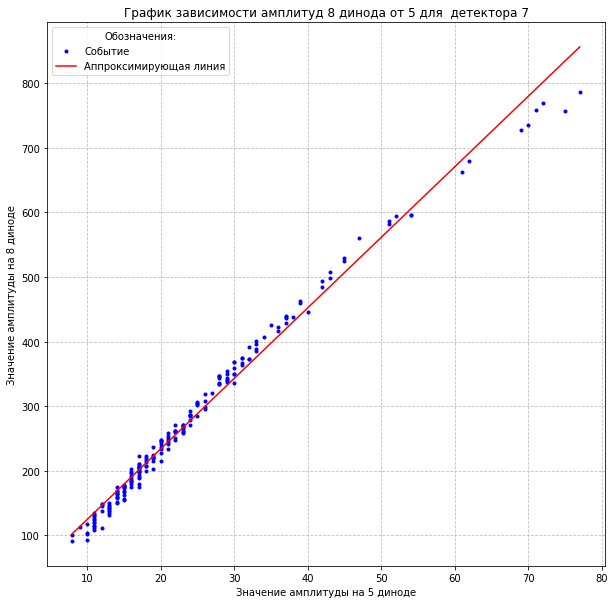

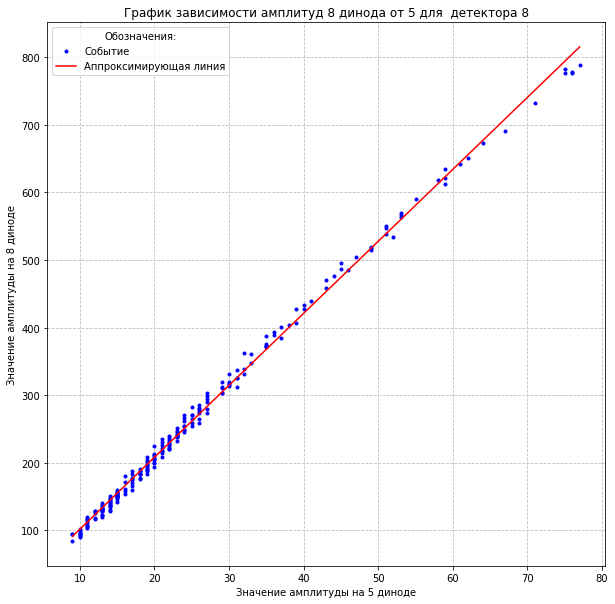

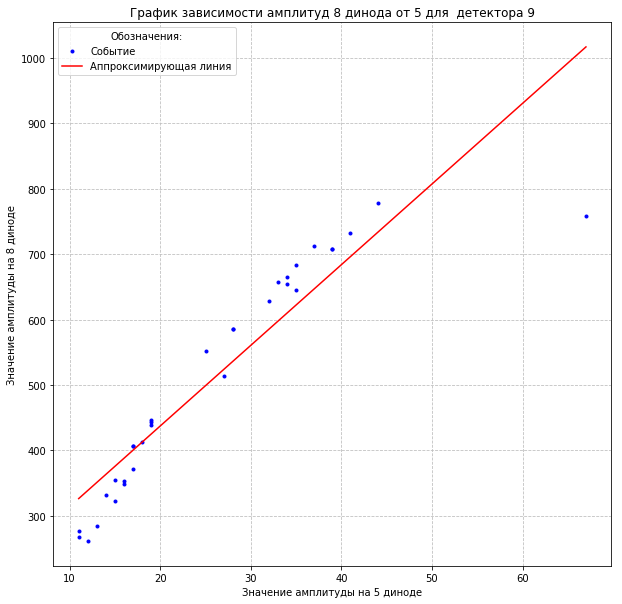

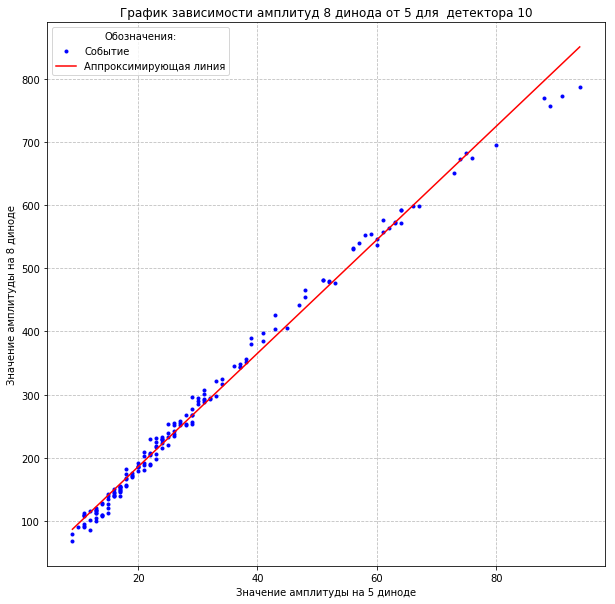

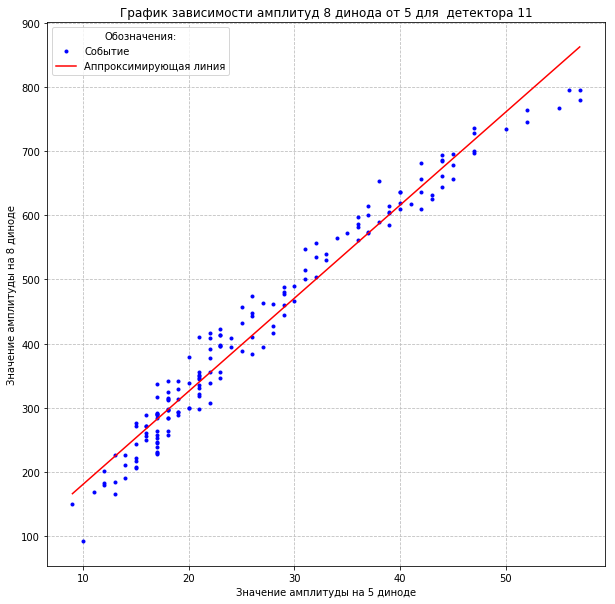

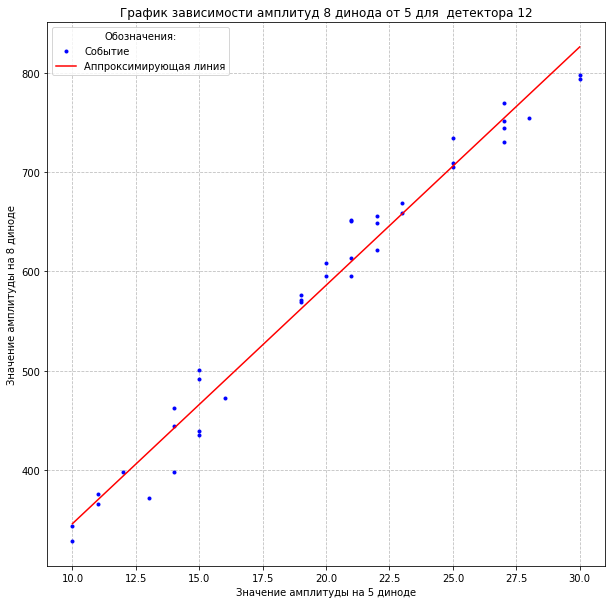

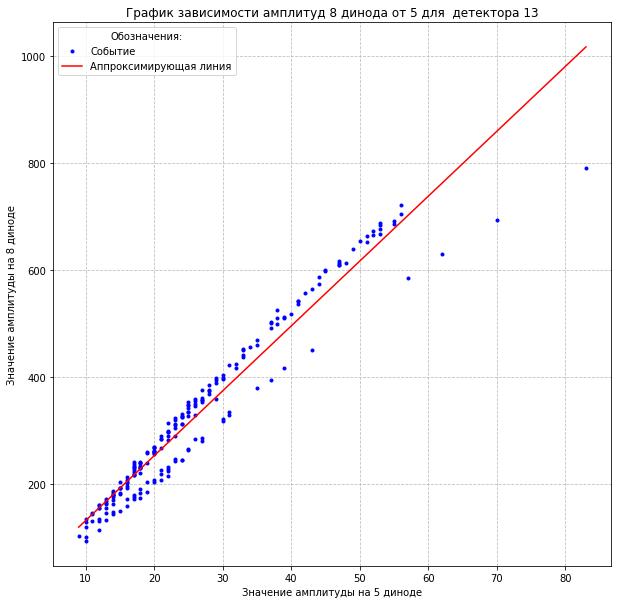

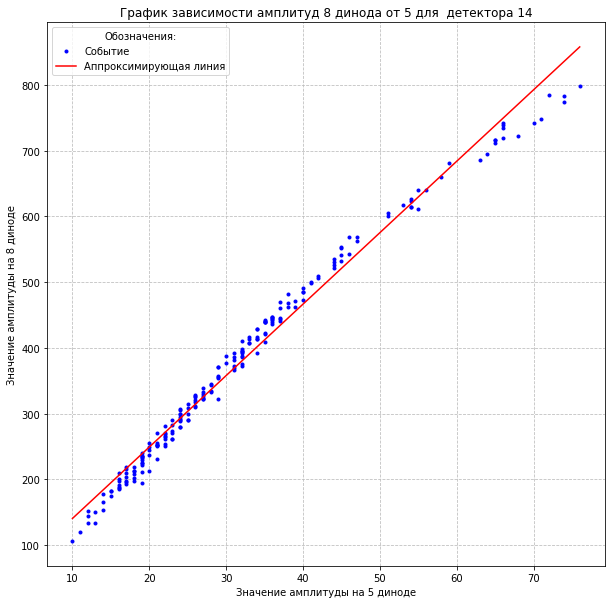

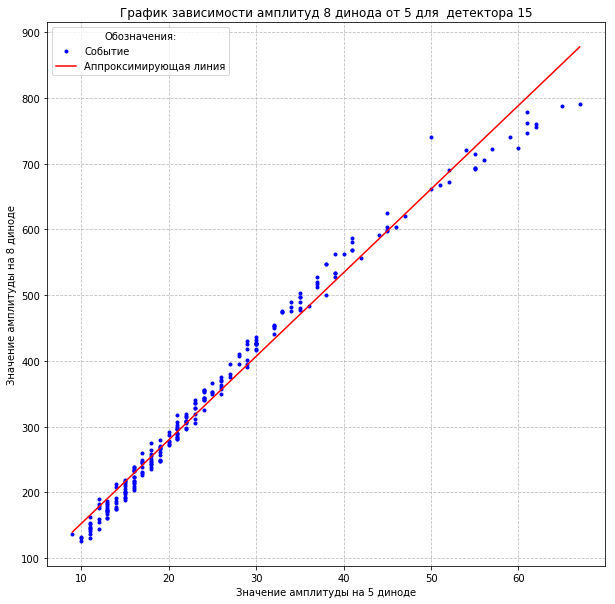

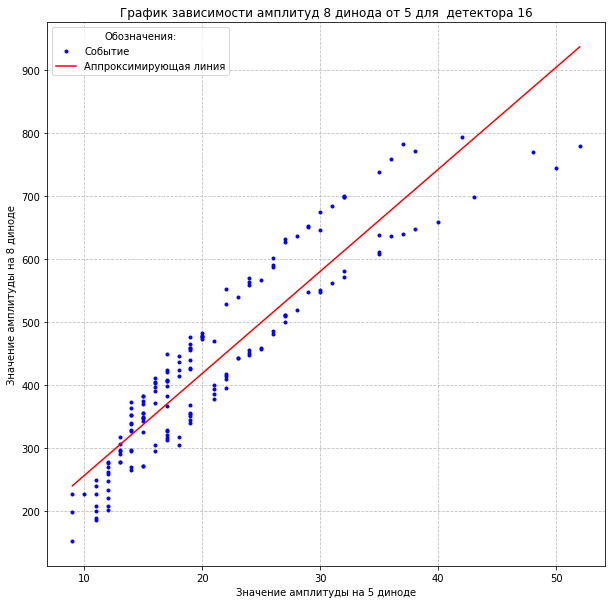

In [102]:
for i in range (1,17,1):
    plt.figure(i, figsize = (10, 10))
    plt.subplot(1,1,1)
    x=np.array(dynods[dynods['det_num']==i][dynods['date'] > '2017-12-30'][dynods['Ampl_5']>0][dynods['Ampl_8']<800]['Ampl_5'])
    y=np.array(dynods[dynods['det_num']==i][dynods['date'] > '2017-12-30'][dynods['Ampl_5']>0][dynods['Ampl_8']<800]['Ampl_8'])
    
    #x=np.array(dynods[dynods['det_num']==i][dynods['date'] > '2018-01-12'][dynods['Ampl_5']>0]['Ampl_5'])
    #y=np.array(dynods[dynods['det_num']==i][dynods['date'] > '2018-01-12'][dynods['Ampl_5']>0]['Ampl_8'])
    
    plt. xlabel('Значение амплитуды на 5 диноде')
    plt. ylabel('Значение амплитуды на 8 диноде')
    plt.title('График зависимости амплитуд 8 динода от 5 для  детектора %d' %i)
    plt.plot(x, y,'.',color='b', label = u'Событие')
    z=np.polyfit(x,y,1)
    plt.grid(True, linestyle='--', color='0.75')
    plt.plot(np.sort(x), z[0]*np.sort(x)+ z[1], 'r', label=u'Аппроксимирующая линия')
    print('Коэффициенты аппроксимации для детектора %d: x*%f + %f' %(i, z[0], z[1]))
    plt.legend(title='Обозначения:')